In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Question 3:

part 2:

In [3]:
#define image1 here
image1 = np.array([[150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154],
                   [150, 151, 153, 155, 156, 155, 154]], np.float32)

In [4]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return(hist)

Text(0.5, 1.0, 'histogram')

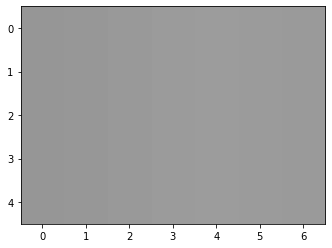

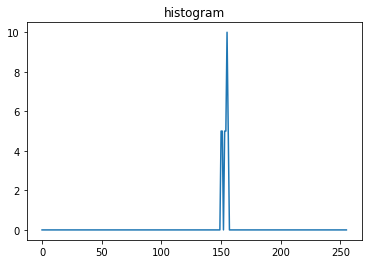

In [5]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [6]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  f_min = np.min(image)
  f_max = np.max(image)
  MIN = 0 
  MAX = 255
  for x in np.nditer(output_image, op_flags=['readwrite']):
    x[...] = round(((x-f_min) / (f_max-f_min)) * (MAX-MIN) + MIN)
  # End
  return output_image


Text(0.5, 1.0, 'new histogram')

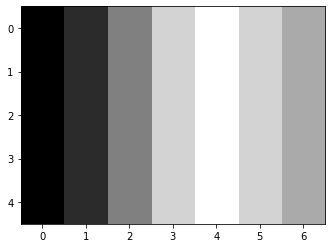

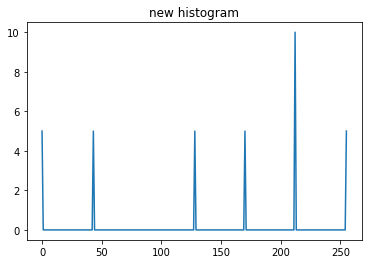

In [7]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


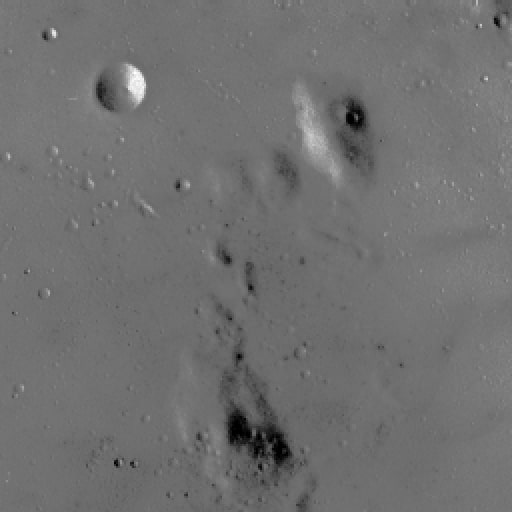

In [8]:
# first read the image and show it.(image2)
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW1/Q3_image/image2.jpg'
image2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(image2)

Text(0.5, 1.0, 'new histogram')

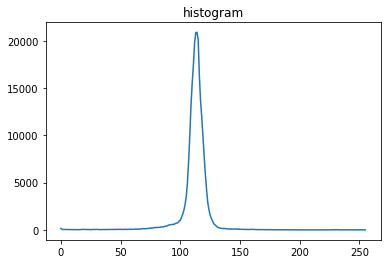

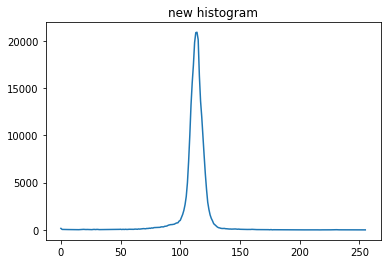

In [9]:
#use stretch function to improve quality of the image and show it
# show thw histogram of image2 before improvement
plt.figure()
plt.plot(calc_hist(image2))
plt.title('histogram')

# improve the image2 with stretch
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('new histogram')

In [10]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  MIN = 0
  MAX = 255
  one_percent = int((image.shape[0] * image.shape[1]) / 100)
  sorted_pixels = np.sort(image.flatten())
  clipped_img = sorted_pixels[one_percent:len(sorted_pixels)-(one_percent)]
  # Define lower and upper clipping thresholds
  f1 = clipped_img.min()
  f99 = clipped_img.max()
  ############
  # Your code
  for x in np.nditer(output_image, op_flags=['readwrite']):
    if x < f1:
      x[...] = MIN
      continue
    elif x > f99:
      x[...] = MAX
      continue
    else:
      x[...] = round(((x-f1) / (f99-f1)) * (MAX-MIN) + MIN)
  # End
  ############
  cv2_imshow(output_image)
  return output_image


def histogram_equalization(image):
  output_image = image.copy()
  hist = np.zeros(256, dtype=np.float32)
  MIN = 0
  MAX = 255
  # Calculate histogram of input image
  hist = calc_hist(image)
  # Calculate (CDF)
  cdf = np.zeros(256, dtype=np.float32)
  cdf[0] = hist[0]
  for i in range(1, len(hist)):
    cdf[i] = cdf[i-1] + hist[i]
  cdf_normalized = MAX*(cdf / float((image.shape[0] * image.shape[1])))
  # Map image intensities to new values using CDF
  for x in np.nditer(output_image, op_flags=['readwrite']):
      x[...] = round(cdf_normalized[x])
  # cv2_imshow(output_image)
  return modified_stretch_hist(output_image)


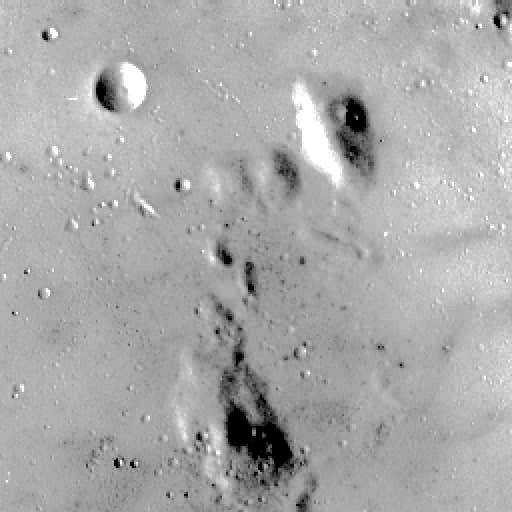

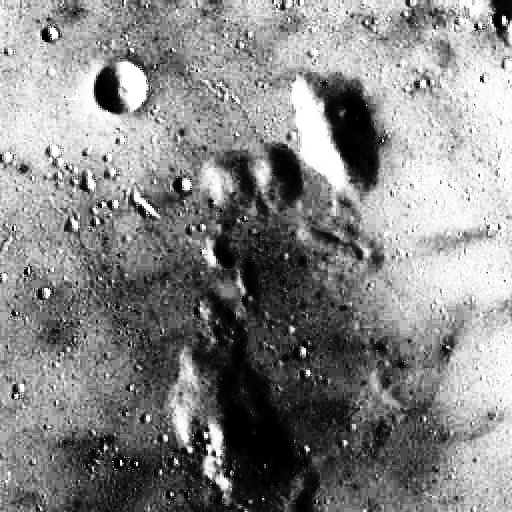

Text(0.5, 1.0, 'histogram equalization:')

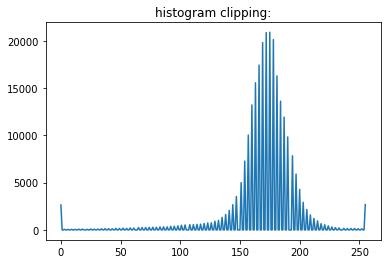

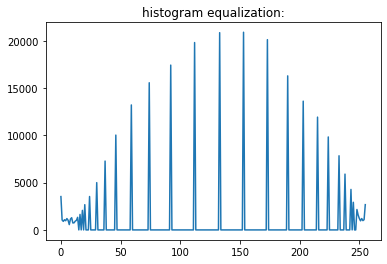

In [11]:
#try your new function and show the result
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))
plt.title('histogram clipping:')

plt.figure()
plt.plot(calc_hist(histogram_equalization(image2)))
plt.title('histogram equalization:')
